<a href="https://colab.research.google.com/github/introspective321/Image_Retrieval_CIFAR-10/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading CIFAR-10 Dataset

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz

--2024-03-26 11:58:56--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  60.2MB/s    in 2.7s    

2024-03-26 11:58:59 (60.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [7]:
data_batch_1 = unpickle(r'/content/cifar-10-batches-py/data_batch_1')
print(type(data_batch_1))
print("--------------------------")
print(data_batch_1.keys())
print("--------------------------")
for item in data_batch_1:
    print(item, type(data_batch_1[item]))
print("--------------------------")
print("Labels:", set(data_batch_1['labels']))

<class 'dict'>
--------------------------
dict_keys(['batch_label', 'labels', 'data', 'filenames'])
--------------------------
batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>
--------------------------
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [26]:
import numpy as np
batch_1 = unpickle('/content/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('/content/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('/content/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('/content/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('/content/cifar-10-batches-py/data_batch_5')
test_batch =unpickle('/content/cifar-10-batches-py/test_batch')

X_train_pixel = np.concatenate([batch_1['data'], batch_2['data'], batch_3['data'], batch_4['data'], batch_5['data']], axis=0)
y_train_pixel = np.concatenate([batch_1['labels'], batch_2['labels'], batch_3['labels'], batch_4['labels'], batch_5['labels']], axis=0)

X_test_pixel = test_batch['data']
y_test_pixel = test_batch['labels']

# Reshape the image data to its original dimensions
X_train_pixel = X_train_pixel.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X_test_pixel = X_test_pixel.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f'Training Samples: {len(X_train_pixel)}')
print(f'Testing Samples: {len(X_test_pixel)}')

Training Samples: 50000
Testing Samples: 10000


In [28]:
print(X_train_pixel[0].shape)

(32, 32, 3)


## Preprocessing

In [60]:
import cv2
import numpy as np

def rgb2gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Converting to grayscale
X_training_gray = [ rgb2gray(np.array(X_train_pixel[i])) for i in range(50000)]
X_testing_gray  = [ rgb2gray(np.array(X_test_pixel[i])) for i in range(10000)]

RGB along with corresponding grayscaled image



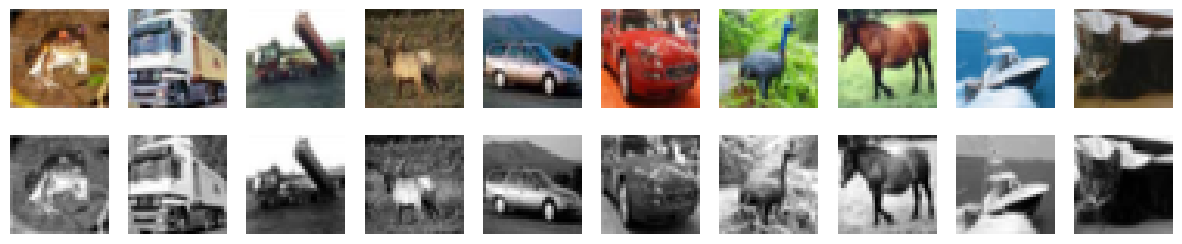

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

num_images = 10

plt.figure(figsize=(15, 3))
for i in range(num_images):
    # RGB image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X_train_pixel[i])
    plt.axis('off')

    # grayscale image
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(X_training_gray[i], cmap='gray')
    plt.axis('off')

print("RGB along with corresponding grayscaled image\n")
plt.show()


## Feature Extraction (HoGs)

In [78]:
from skimage.feature import hog
from skimage import exposure

orientations = 9
pixels_per_cell = (4, 4)
cells_per_block = (2, 2)

def extract_hog_features(image):
    # Compute HoG features
    hog_features, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                                   cells_per_block=cells_per_block, visualize=True)

    # Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

In [80]:
X_train_HoG = []
X_train_HoG_rescaled = []

for image in X_training_gray:
    hog_features, hog_image = extract_hog_features(image)
    X_train_HoG.append(hog_features)
    X_train_HoG_rescaled.append(hog_image)

X_test_HoG = []
X_test_HoG_rescaled = []

for image in X_testing_gray:
    hog_features, hog_image = extract_hog_features(image)
    X_test_HoG.append(hog_features)
    X_test_HoG_rescaled.append(hog_image)

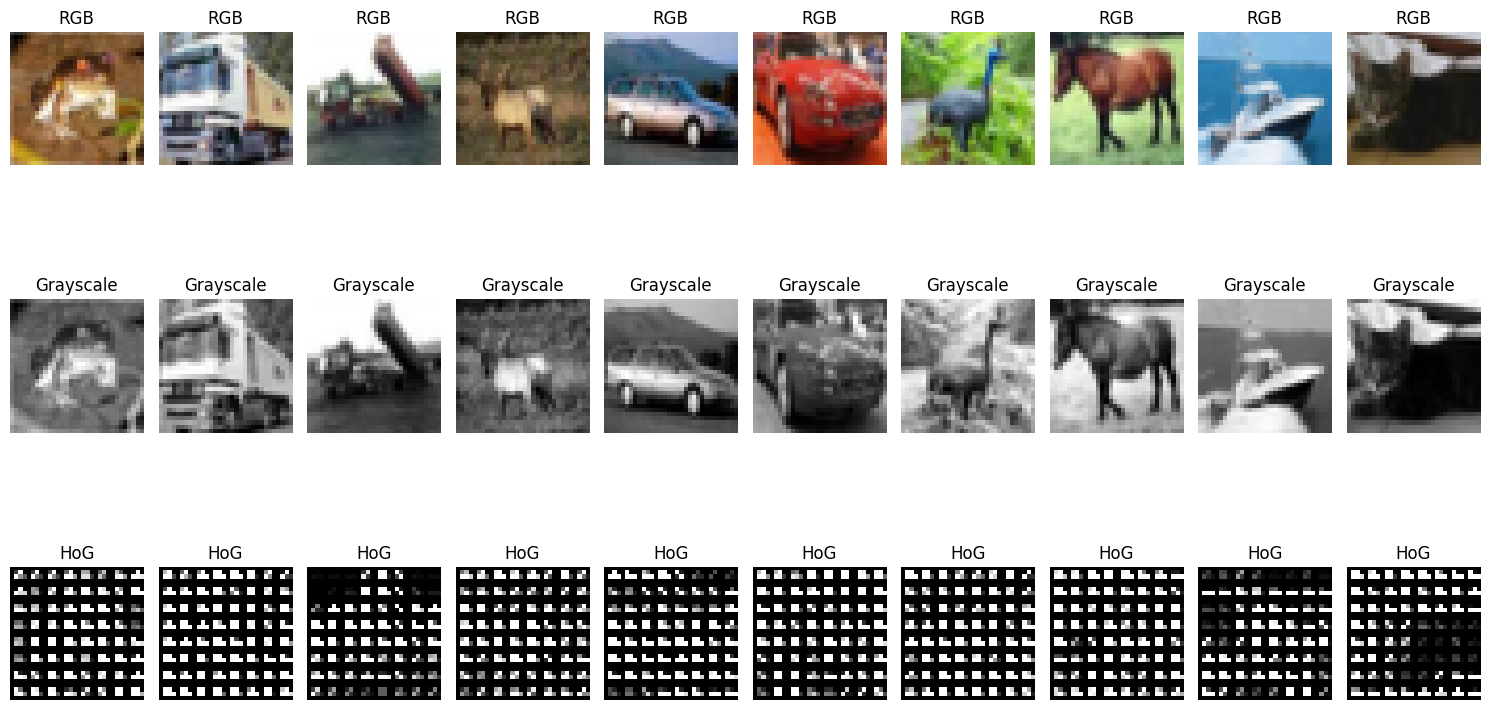

In [84]:
num_images = 10

plt.figure(figsize=(15, 9))  # Adjust the figure size to accommodate three images per row

for i in range(num_images):
    # RGB image
    plt.subplot(3, num_images, i + 1)
    plt.imshow(X_train_pixel[i])
    plt.title('RGB')
    plt.axis('off')

    # Grayscale image
    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(X_training_gray[i], cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # HoG visualization
    plt.subplot(3, num_images, i + 1 + 2 * num_images)
    # Assuming X_train_HoG_rescaled contains the rescaled HoG images
    plt.imshow(X_train_HoG_rescaled[i], cmap='gray')
    plt.title('HoG')
    plt.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
